In [4]:
# import basic libraries for data manipulation and numerical operations
import numpy as np
import pandas as pd
#import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# import scikit-learn for machine learning tasks
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# california housing prediction
## step 1: import libraries
in this step we will import necessary libraries for data manipulation, visualization, and machine learning.

In [5]:
# load the dataset
data = fetch_california_housing(as_frame=True)
#convert to pandas DataFrame for easier manipulation
df = data.frame
#display the first 5 rows of the dataset
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## step 2: load and explore the dataset
in this step, we will load the boston housing dataset using `scikit-learn` and convert it to pandas DataFrame.
we will also check the first few rows to get an overview of the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


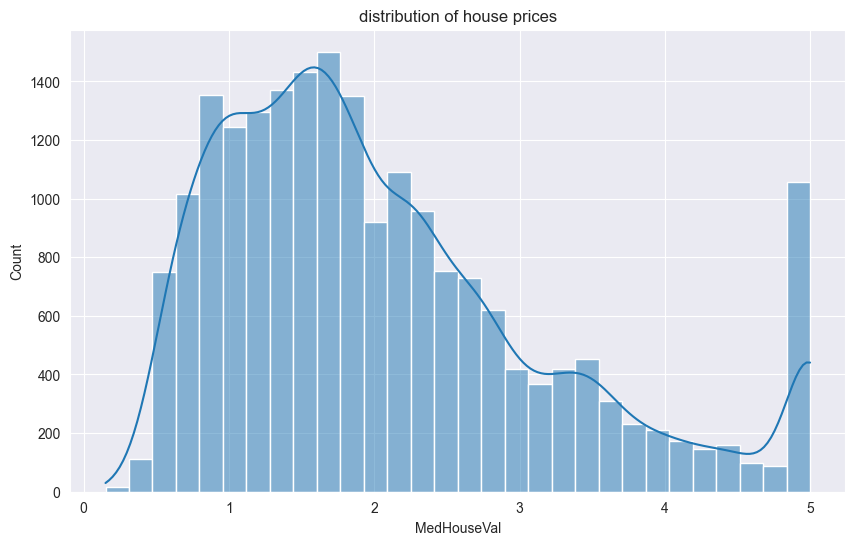

In [7]:
# Check for missing values and data types
df.info()
df.describe()
plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], bins=30, kde=True)
plt.title('distribution of house prices')
plt.show()

## step3 : initial data exploration
in this step, we will:
1. check for missing values and data types.
2. generate descriptive statistics for the dataset.
3. plot the distribution of house prices to understand the target variable.

In [8]:
# check for missing values in each column
missing_values = df.isnull().sum()
#print the columns with missing values (if any)
print('missing values in each column:')
print(missing_values)

missing values in each column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


## step 4: data preprocessing
## step 4.1: check for missing values
in this step, we will check for missing values in the dataset and decide how to handle them.

In [9]:
# create a standardscaler object
scaler = StandardScaler()
# normalize the feature columns (excluding the target variable 'MedHouseVal'
scaled_feature = scaler.fit_transform(df.drop('MedHouseVal', axis=1))
# convert the scaled feature back to a DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_feature, columns=df.columns[:-1])
# add the target column back to the DataFrame
scaled_df['MedHouseVal']=df['MedHouseVal']
# display the first 5 rows of the normalized dataset
scaled_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,4.526
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,3.585
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,3.521
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,3.413
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,3.422


## step 4.2: normalized the features
we will normalize the feature values to ensure all features are on a similar scale.
this help the model converge faster and improves accuracy

In [10]:
# define the features (x) and the target variable (y)
x = scaled_df.drop('MedHouseVal',axis=1)
y = scaled_df['MedHouseVal']
# split the data into training(80%) and testing(20%) sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# print the shape of the training and testing sets
print('training set shape (x) :', x_train.shape)
print('training set shape (y) :', y_train.shape)
print('testing set shape (x) :', x_test.shape)
print('testing set shape (y) :', y_test.shape)

training set shape (x) : (16512, 8)
training set shape (y) : (16512,)
testing set shape (x) : (4128, 8)
testing set shape (y) : (4128,)


## step 4.3 : split the data into training and testing sets
in this step we will split the dataset into training(80%) and testing(20%) sets.
this allows us to evaluate the model's performance on unseen data.

In [13]:
# initialize the linear regression model
lin_reg = LinearRegression()
#train the model using the training set
lin_reg.fit(x_train, y_train)
# make predictions on the test set
y_pred_lin = lin_reg.predict(x_test)
# evaluate the model
rmse_lin = mean_squared_error(y_test, y_pred_lin) #squared=False)
r2_lin = r2_score(y_test, y_pred_lin)
#print evaluate metrics
print('Linear Regression results:')
print(f"RMSE:{rmse_lin:.2f}")
print(f"R2 score:{r2_lin:.2f}")

Linear Regression results:
RMSE:0.56
R2 score:0.58


## step 5:model training and evaluation
## step 5.1:linear regression model
in this step, we will train a linear regression model and evaluate its performance

In [14]:
from sklearn.ensemble import RandomForestRegressor
# initial the random forest regressor
rf_reg = RandomForestRegressor(random_state=42)
#train the model using the training set
rf_reg.fit(x_train, y_train)
#make predictions on the test set
y_pred_rf = rf_reg.predict(x_test)
#evaluate the model
rmse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
#print evaluation metrics
print("\nrandomforest regressor results:")
print(f"RMSE:{rmse_rf:.2f}")
print(f"r2 score: {r2_rf:.2f}")



randomforest regressor results:
RMSE:0.26
r2 score: 0.80


## step 5.2:random forest regressor
we will train a random forest regressor and compare its performance with the linear regression model.

In [3]:
from xgboost import XGBRegressor
#initialize the xgboost regressor
xgb_reg = XGBRegressor(random_forest=42)
#train the model using the training set
xgb_reg.fit(x_train, y_train)
#make predictions on the test set
y_pred_xgb = xgb_reg.predict(x_test)
# evaluate the model
rmse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
#print evaluation metrics
print("\nxgboost regressor results:")
print(f"rmse: {rmse_xgb:.2f}")
print(f"r2 :{r2_xgb:.2f}")

NameError: name 'x_train' is not defined

## step 5.3: xgboost regressor
in this step, we will use the XGBoost regressor for more accurate predictions and compare its performance

In [ ]:
import joblib
# save the model
joblib.dump(xgb_reg,'xgboost_model.pkl')
#load the model later
xgb_loaded=joblib.load('xgboost_model.pkl')

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

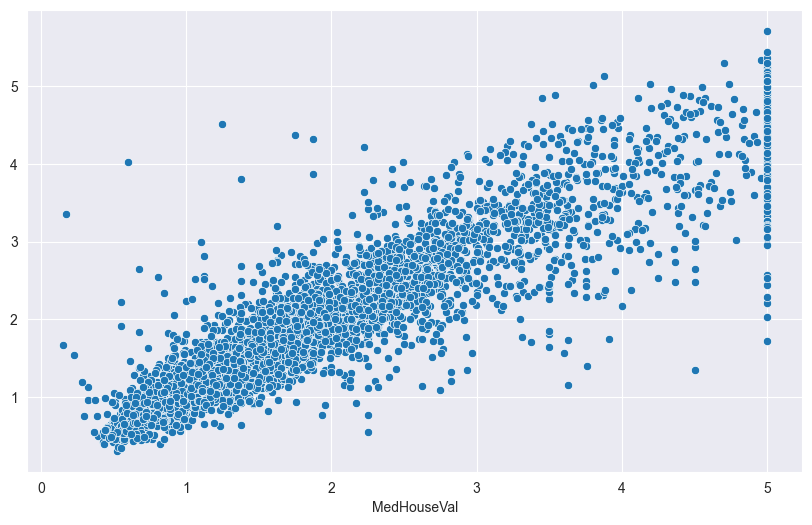

In [20]:
#plot actual vs predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb)
plt.xlable("actual values")
plt.ylable("predicted values")
plt.title("actual vs predicted values(XGBoost)")
plt.show()

<Figure size 1000x800 with 0 Axes>

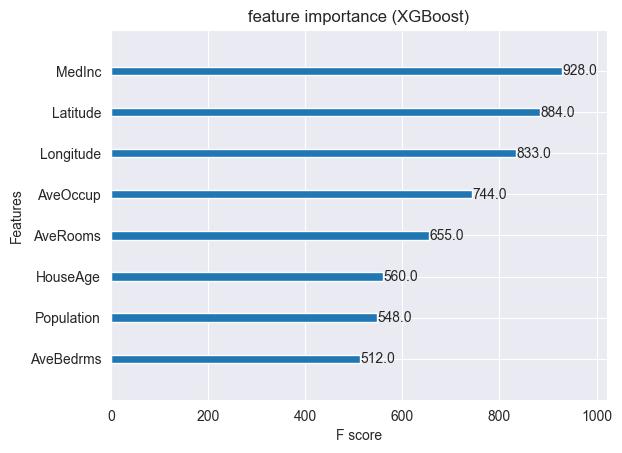

In [17]:
from xgboost import plot_importance
#plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_reg)
plt.title("feature importance (XGBoost)")
plt.show()

In [4]:
import joblib
joblib.dump(xgb_reg, "xgboost-model.pkl")

['xgboost-model.pkl']